# RQ1: What does the video games market look like in different regions?

This question is for us to have an idea of how the video games looks like. After this, we can do further analysis.

## 1. Prepare the environment

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import numpy as np
import seaborn as sns  
%matplotlib inline

## 2. Load the dataset

In [167]:
df = pd.read_csv('final_dataset.csv', parse_dates=['released'], dayfirst=False)
df['Year'] = df['released'].dt.year

## 3. Setup

In [169]:
region_cols = ['NA_Sales(MM)','EU_Sales(MM)','JP_Sales(MM)','Other_Sales(MM)']
totals = df[region_cols].sum()

colors_dict = {
    'NA_Sales(MM)': '#ff7f0e',  # orange
    'EU_Sales(MM)': '#2ca02c',  # green
    'JP_Sales(MM)': '#1f77b4',  # blue
    'Other_Sales(MM)': '#9467bd'  # purple
}


## 4 Overview of the 4 markets

### 4.1 Market Share

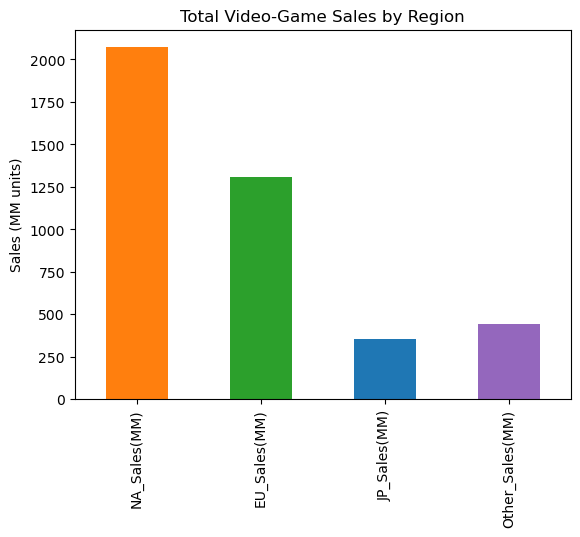

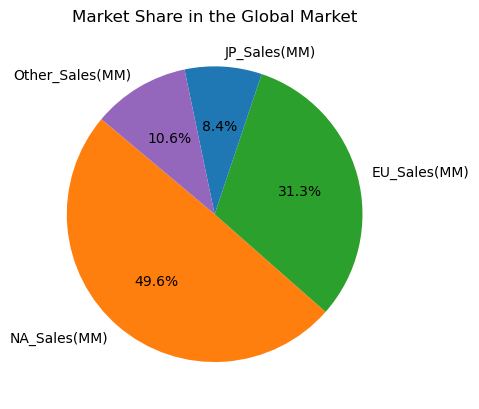

In [172]:
# BarChart
plt.figure()
totals.plot.bar(color=[colors_dict[col] for col in totals.index])
plt.title("Total Video‑Game Sales by Region")
plt.ylabel("Sales (MM units)")
plt.show()

# Pie Chart
plt.figure()
plt.pie(totals, labels=totals.index, autopct='%1.1f%%', startangle=140, colors=[colors_dict[col] for col in totals.index])
plt.title("Market Share in the Global Market")
plt.show()


### 4.2 Sales Distribution

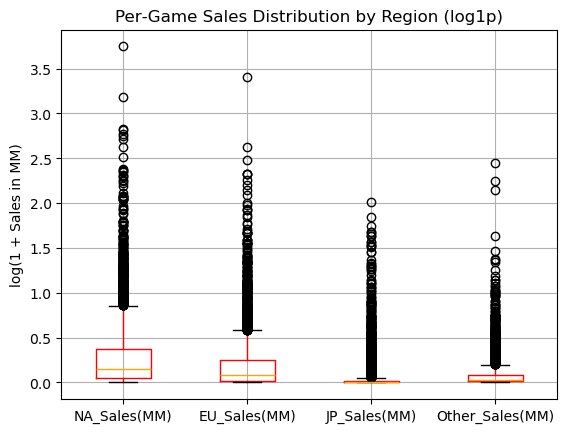

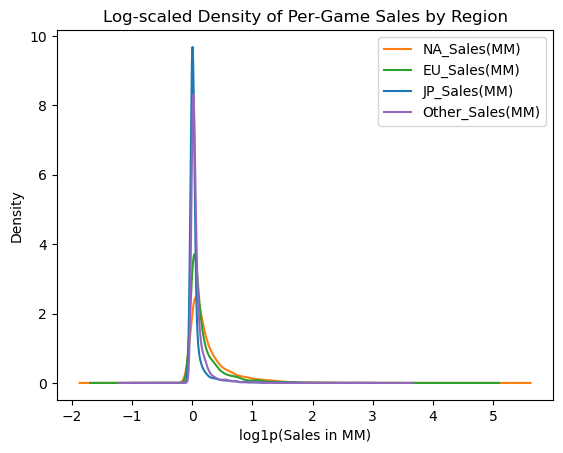

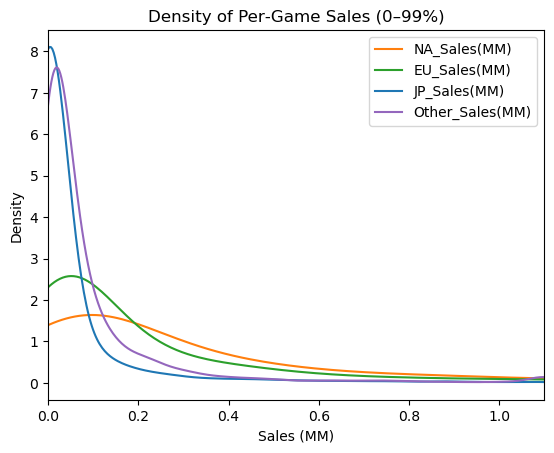

In [174]:
# Distribution of Sales in the 4 markets
plt.figure()
df_log = np.log1p(df[region_cols])
df_log.boxplot()
plt.title("Per‑Game Sales Distribution by Region (log1p)")
plt.ylabel("log(1 + Sales in MM)")
plt.show()

plt.figure()
for col in region_cols:
    np.log1p(df[col]).plot(kind='kde', label=col,  color=colors_dict[col])  # log1p = log(1+x)
plt.title("Log‑scaled Density of Per‑Game Sales by Region")
plt.xlabel("log1p(Sales in MM)")
plt.legend()
plt.show()

plt.figure()
for col in region_cols:
    clip_max = df[col].quantile(0.99)
    data = df[col].clip(0, clip_max)
    data.plot(kind='kde', label=col,  color=colors_dict[col])
plt.xlim(0, clip_max)
plt.title("Density of Per‑Game Sales (0–99%)")
plt.xlabel("Sales (MM)")
plt.legend()
plt.show()



### 4.3 Regional Sales by Platform Group

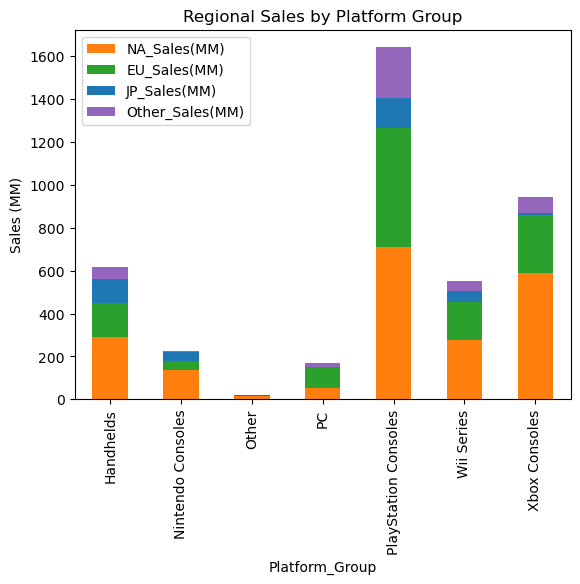

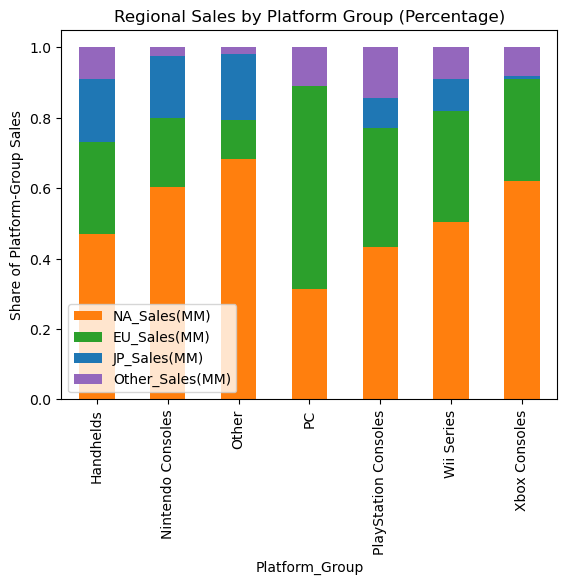

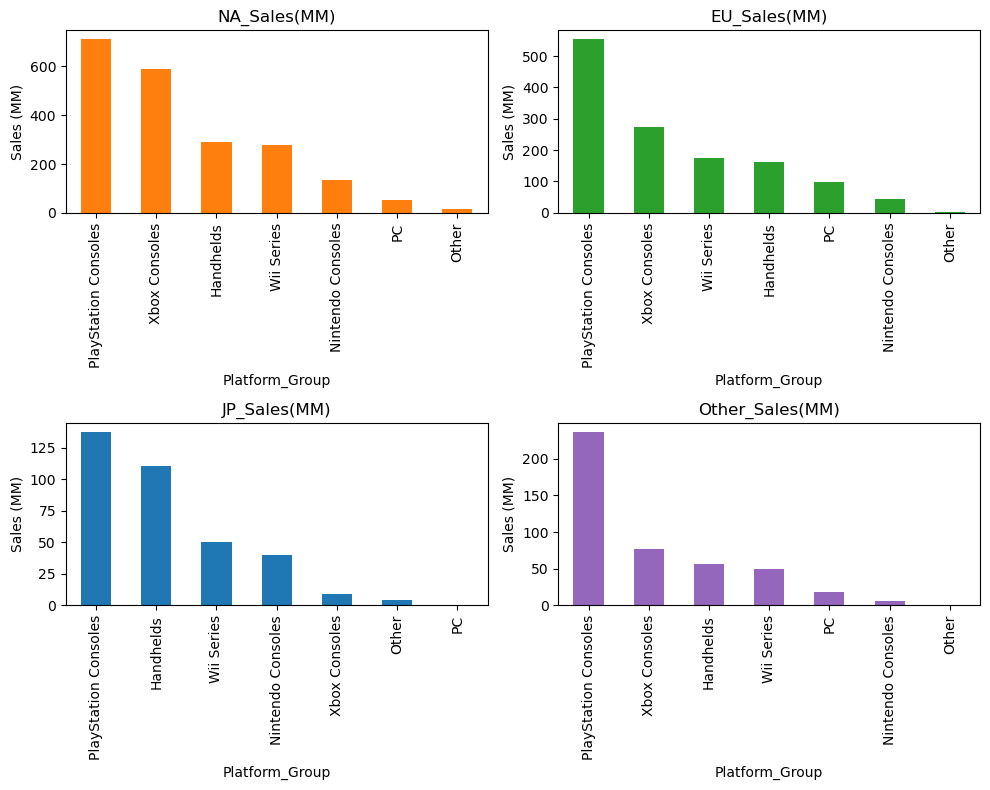

In [176]:
# Absolute stacked bars
platform_group = df.groupby('Platform_Group')[region_cols].sum()
platform_group.plot(kind='bar', stacked=True, color=[colors_dict[col] for col in totals.index])
plt.title("Regional Sales by Platform Group")
plt.ylabel("Sales (MM)")
plt.show()

# Proportional stacked bars
(platform_group
 .div(platform_group.sum(axis=1), axis=0)
 .plot(kind='bar', stacked=True, color=[colors_dict[col] for col in totals.index]))
plt.title("Regional Sales by Platform Group (Percentage)")
plt.ylabel("Share of Platform‑Group Sales")
plt.show()

# Separate grpahs in the 4 markets
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for ax, col in zip(axes, region_cols):
    platform_group[col].sort_values(ascending=False).plot.bar(ax=ax, color=colors_dict[col])
    ax.set_title(col)
    ax.set_ylabel("Sales (MM)")
fig.tight_layout()
plt.show()


### 4.4 Genre vs Region

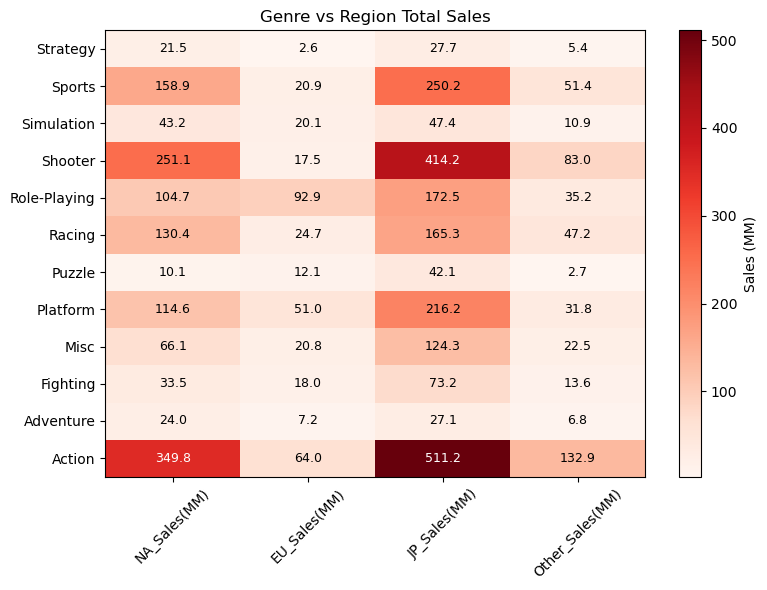

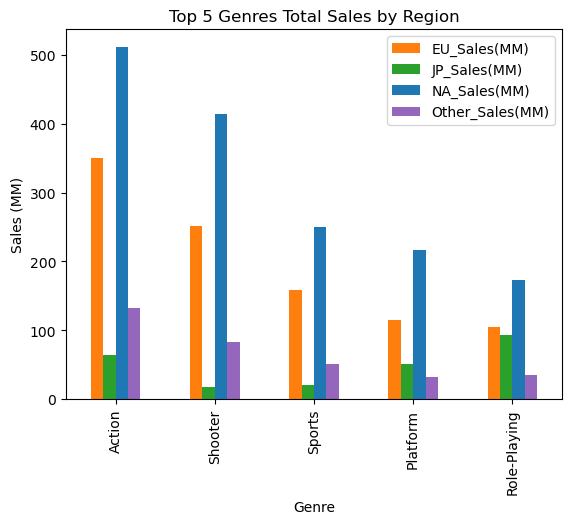

In [178]:
#Heatmap
genre_region = df.pivot_table(index='Genre', values=region_cols, aggfunc='sum')
plt.figure(figsize=(8, 6))
plt.imshow(genre_region, aspect='auto', origin='lower', cmap='Reds')
plt.colorbar(label='Sales (MM)')
plt.yticks(range(len(genre_region)), genre_region.index)
plt.xticks(range(len(region_cols)), region_cols, rotation=45)
plt.title("Genre vs Region Total Sales")
for i in range(len(genre_region)):
    for j in range(len(region_cols)):
        value = genre_region.iloc[i, j]
        color = 'black' if value < genre_region.values.max() * 0.6 else 'white'
        plt.text(j, i, f"{value:.1f}", ha='center', va='center', fontsize=9, color=color)
plt.tight_layout()
plt.show()


#top‑5 genres
top5 = genre_region.sum(axis=1).nlargest(5).index
genre_region.loc[top5].plot.bar(color=[colors_dict[col] for col in totals.index])
plt.title("Top 5 Genres Total Sales by Region")
plt.ylabel("Sales (MM)")
plt.show()

